# Programming Assignment: Build a CNN for image recognition.

### Name: Charley Padron


## 0. You will do the following:

1. Read, complete, and run the code.

2. **Make substantial improvements** to maximize the accuracy.
    
3. Convert the .IPYNB file to .HTML file.

    * The HTML file must contain the code and the output after execution.
    
    * Missing **the output after execution** will not be graded.


4. Upload the .HTML file to your Google Drive, Dropbox, or Github repo. (If you submit the file to Google Drive or Dropbox, you must make the file "open-access". The delay caused by "deny of access" may result in late penalty.)

4. On Canvas, submit the Google Drive/Dropbox/Github link to the HTML file.


## Requirements:

1. You can use whatever CNN architecture, including VGG, Inception, and ResNet. However, you must build the networks layer by layer. You must NOT import the archetectures from ```keras.applications```.

2. Make sure ```BatchNormalization``` is between a ```Conv```/```Dense``` layer and an ```activation``` layer.

3. If you want to regularize a ```Conv```/```Dense``` layer, you should place a ```Dropout``` layer **before** the ```Conv```/```Dense``` layer.

4. An accuracy above 70% is considered reasonable. An accuracy above 80% is considered good. Without data augmentation, achieving 80% accuracy is difficult.


## Google Colab

- If you do not have GPU, the training of a CNN can be slow. Google Colab is a good option.

- Keep in mind that you must download it as an IPYNB file and then use IPython Notebook to convert it to HTML.

- Also keep in mind that the IPYNB and HTML files must contain the outputs. (Otherwise, the instructor will not be able to know the correctness and performance.) Do the followings to keep the outputs.

- In Colab, go to ```Runtime``` --> ```Change runtime type``` --> Do NOT check ```Omit code cell output when saving this notebook```. In this way, the downloaded IPYNB file contains the outputs.

## 1. Data preparation

### 1.1. Load data


In [1]:
from keras.datasets import cifar10
import numpy

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('shape of x_train: ' + str(x_train.shape))
print('shape of y_train: ' + str(y_train.shape))
print('shape of x_test: ' + str(x_test.shape))
print('shape of y_test: ' + str(y_test.shape))
print('number of classes: ' + str(numpy.max(y_train) - numpy.min(y_train) + 1))

shape of x_train: (50000, 32, 32, 3)
shape of y_train: (50000, 1)
shape of x_test: (10000, 32, 32, 3)
shape of y_test: (10000, 1)
number of classes: 10


### 1.2. One-hot encode the labels

In the input, a label is a scalar in $\{0, 1, \cdots , 9\}$. One-hot encode transform such a scalar to a $10$-dim vector. E.g., a scalar ```y_train[j]=3``` is transformed to the vector ```y_train_vec[j]=[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]```.

1. Define a function ```to_one_hot``` that transforms an $n\times 1$ array to a $n\times 10$ matrix.

2. Apply the function to ```y_train``` and ```y_test```.

In [2]:
def to_one_hot(y, num_class=10):
    results = numpy.zeros((len(y), num_class))
    for i, label in enumerate(y):
        results[i, label] = 1
    return results

y_train_vec = to_one_hot(y_train)
y_test_vec = to_one_hot(y_test)

print('Shape of y_train_vec: ' + str(y_train_vec.shape))
print('Shape of y_test_vec: ' + str(y_test_vec.shape))

print(y_train[0])
print(y_train_vec[0])

Shape of y_train_vec: (50000, 10)
Shape of y_test_vec: (10000, 10)
[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


#### Remark: the outputs should be
* Shape of y_train_vec: (50000, 10)
* Shape of y_test_vec: (10000, 10)
* [6]
* [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]

### 1.3. Randomly partition the training set to training and validation sets

Randomly partition the 50K training samples to 2 sets:
* a training set containing 40K samples
* a validation set containing 10K samples


In [3]:
rand_indices = numpy.random.permutation(50000)
train_indices = rand_indices[0:40000]
valid_indices = rand_indices[40000:50000]

x_val = x_train[valid_indices, :]
y_val = y_train_vec[valid_indices, :]

x_tr = x_train[train_indices, :]
y_tr = y_train_vec[train_indices, :]

print('Shape of x_tr: ' + str(x_tr.shape))
print('Shape of y_tr: ' + str(y_tr.shape))
print('Shape of x_val: ' + str(x_val.shape))
print('Shape of y_val: ' + str(y_val.shape))

Shape of x_tr: (40000, 32, 32, 3)
Shape of y_tr: (40000, 10)
Shape of x_val: (10000, 32, 32, 3)
Shape of y_val: (10000, 10)


## 2. Build a CNN and tune its hyper-parameters

1. Build a convolutional neural network model
2. Use the validation data to tune the hyper-parameters (e.g., network structure, and optimization algorithm)
    * Do NOT use test data for hyper-parameter tuning!!!
3. Try to achieve a validation accuracy as high as possible.

### Remark: 

The following CNN is just an example. You are supposed to make **substantial improvements** such as:
* Add more layers.
* Use regularizations, e.g., dropout.
* Use batch normalization.

In [4]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout, Activation
from keras.models import Sequential

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

#model.add(Dropout(0.5))
#model.add(Dropout(0.25))
model.add(Dropout(0.12))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))


#model.add(Dropout(0.5))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
#model.add(BatchNormalization())
#model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

#model.add(Dropout(0.5))
#model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
#model.add(BatchNormalization())
#model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dropout(0.5))
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0

In [5]:
from tensorflow import keras
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

#learning_rate = 1E-5 # to be tuned!
#learning_rate = 1E-4 # to be tuned!
learning_rate = 1E-3 # to be tuned!
#learning_rate = 1E-2 # to be tuned!

train_datagen = ImageDataGenerator(
rescale=1./255,
#rotation_range=40,
#rotation_range=20,
rotation_range=10,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_datagen.fit(x_tr)

b=32

train_generator = train_datagen.flow(x_tr, y_tr, batch_size=b)
val_generator = val_datagen.flow(x_val, y_val, batch_size=b)

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(learning_rate=learning_rate),
              metrics=['acc'])

In [6]:
#history = model.fit(x_tr, y_tr, batch_size=32, epochs=10, validation_data=(x_val, y_val))
history = model.fit(train_generator, epochs=20, validation_data=val_generator)

Epoch 1/20
1250/1250 [==============================] - 142s 111ms/step - loss: 1.8654 - acc: 0.3007 - val_loss: 1.7841 - val_acc: 0.3648
Epoch 2/20
1250/1250 [==============================] - 138s 110ms/step - loss: 1.5067 - acc: 0.4436 - val_loss: 1.6010 - val_acc: 0.4776
Epoch 3/20
1250/1250 [==============================] - 133s 107ms/step - loss: 1.3419 - acc: 0.5137 - val_loss: 1.5867 - val_acc: 0.4920
Epoch 4/20
1250/1250 [==============================] - 131s 105ms/step - loss: 1.2200 - acc: 0.5684 - val_loss: 1.1163 - val_acc: 0.6102
Epoch 5/20
1250/1250 [==============================] - 141s 113ms/step - loss: 1.1347 - acc: 0.6006 - val_loss: 1.6555 - val_acc: 0.5266
Epoch 6/20
1250/1250 [==============================] - 136s 109ms/step - loss: 1.0604 - acc: 0.6331 - val_loss: 1.1079 - val_acc: 0.6352
Epoch 7/20
1250/1250 [==============================] - 138s 110ms/step - loss: 1.0108 - acc: 0.6520 - val_loss: 1.1495 - val_acc: 0.6188
Epoch 8/20
1250/1250 [============

In [8]:
from keras.models import load_model

#model.save('model.h5')
model.save_weights('model')
#model.load_weights('model')

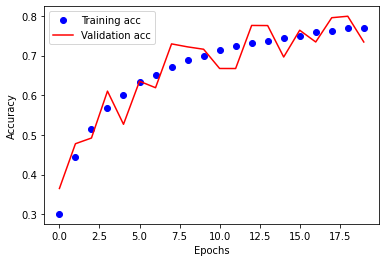

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 3. Train (again) and evaluate the model

- To this end, you have found the "best" hyper-parameters. 
- Now, fix the hyper-parameters and train the network on the entire training set (all the 50K training samples)
- Evaluate your model on the test set.

### 3.1. Train the model on the entire training set

Why? Previously, you used 40K samples for training; you wasted 10K samples for the sake of hyper-parameter tuning. Now you already know the hyper-parameters, so why not using all the 50K samples for training?

In [17]:
#learning_rate = 1E-5 # to be tuned!
#learning_rate = 1E-4 # to be tuned!
learning_rate = 1E-3 # to be tuned!
#learning_rate = 1E-2 # to be tuned!

train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=10,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True
)

train_datagen.fit(x_train)

b=32

train_generator = train_datagen.flow(x_train, y_train_vec, batch_size=b)

test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow(x_test, y_test_vec)

#model = load_model('model.h5')
model.load_weights('model')

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(learning_rate=learning_rate),
              metrics=['acc'])

In [11]:
#history = model.fit(x_train, y_train_vec, batch_size=32, epochs=20)
history = model.fit(train_generator, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 161s 102ms/step - loss: 0.7012 - acc: 0.7672
Epoch 2/20
1563/1563 [==============================] - 153s 98ms/step - loss: 0.6811 - acc: 0.7771
Epoch 3/20
1563/1563 [==============================] - 159s 102ms/step - loss: 0.6734 - acc: 0.7802
Epoch 4/20
1563/1563 [==============================] - 155s 99ms/step - loss: 0.6656 - acc: 0.7816
Epoch 5/20
1563/1563 [==============================] - 156s 100ms/step - loss: 0.6509 - acc: 0.7867
Epoch 6/20
1563/1563 [==============================] - 183s 117ms/step - loss: 0.6381 - acc: 0.7911
Epoch 7/20
1563/1563 [==============================] - 142s 91ms/step - loss: 0.6353 - acc: 0.7915
Epoch 8/20
1563/1563 [==============================] - 139s 89ms/step - loss: 0.6213 - acc: 0.7971
Epoch 9/20
1563/1563 [==============================] - 137s 88ms/step - loss: 0.6145 - acc: 0.7983
Epoch 10/20
1563/1563 [==============================] - 140s 89ms/step - loss: 0.6160 - acc: 0.

In [12]:
model.save_weights('model')
model.load_weights('model')
history = model.fit(train_generator, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 137s 88ms/step - loss: 0.5556 - acc: 0.8190
Epoch 2/10
1563/1563 [==============================] - 136s 87ms/step - loss: 0.5488 - acc: 0.8208
Epoch 3/10
1563/1563 [==============================] - 135s 86ms/step - loss: 0.5380 - acc: 0.8248
Epoch 4/10
1563/1563 [==============================] - 133s 85ms/step - loss: 0.5376 - acc: 0.8255
Epoch 5/10
1563/1563 [==============================] - 132s 84ms/step - loss: 0.5368 - acc: 0.8267
Epoch 6/10
1563/1563 [==============================] - 137s 88ms/step - loss: 0.5389 - acc: 0.8234
Epoch 7/10
1563/1563 [==============================] - 139s 89ms/step - loss: 0.5287 - acc: 0.8273
Epoch 8/10
1563/1563 [==============================] - 138s 88ms/step - loss: 0.5393 - acc: 0.8264
Epoch 9/10
1563/1563 [==============================] - 137s 87ms/step - loss: 0.5329 - acc: 0.8292
Epoch 10/10
1563/1563 [==============================] - 137s 88ms/step - loss: 0.5227 - acc: 0.8306

In [16]:
model.save_weights('model')
model.load_weights('model')
history = model.fit(train_generator, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 137s 88ms/step - loss: 0.5125 - acc: 0.8353
Epoch 2/5
1563/1563 [==============================] - 146s 93ms/step - loss: 0.5094 - acc: 0.8365
Epoch 3/5
1563/1563 [==============================] - 140s 90ms/step - loss: 0.5083 - acc: 0.8363
Epoch 4/5
1563/1563 [==============================] - 138s 89ms/step - loss: 0.5070 - acc: 0.8379
Epoch 5/5
1563/1563 [==============================] - 137s 88ms/step - loss: 0.5084 - acc: 0.8380


In [18]:
model.save_weights('model')
model.load_weights('model')

### 3.2. Evaluate the model on the test set

Do NOT used the test set until now. Make sure that your model parameters and hyper-parameters are independent of the test set.

In [19]:
#loss_and_acc = model.evaluate(x_test, y_test_vec)
loss_and_acc = model.evaluate(test_generator)
print('loss = ' + str(loss_and_acc[0]))
print('accuracy = ' + str(loss_and_acc[1]))

313/313 [==============================] - 6s 19ms/step - loss: 0.5514 - acc: 0.8317
loss = 0.5514371395111084
accuracy = 0.8317000269889832
